# Predictive analysis in Cardiovascular Medicine 

In [1]:
# importing essential libraries and modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.decomposition import KernelPCA, PCA
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report,silhouette_score

In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [4]:
#Dropping DEATH_EVENT Column 
X = data.drop('DEATH_EVENT', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
#Dimensionality reducation using PCA 
pca = PCA(n_components=2)
features_pca = pca.fit_transform(X_scaled)

In [6]:
#Optimal no of clusters
clusters =[]
for i in range(1,11):
    k_means= KMeans(n_clusters=i, random_state=101)
    k_means.fit(X_scaled)
    clusters.append(k_means.inertia_)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

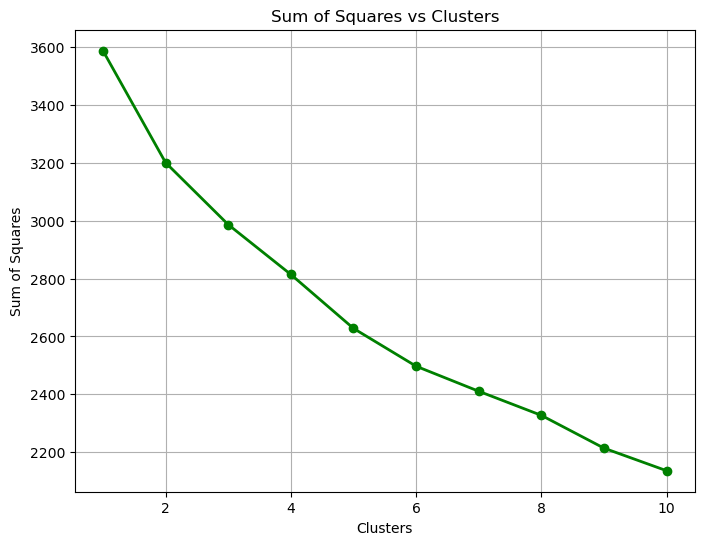

In [33]:
#plotting the clusters
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), clusters, marker='o', linestyle='-', color='g', linewidth=2)  # Change color to green
plt.xlabel('Clusters')
plt.ylabel('Sum of Squares')
plt.grid(True)  # Adding grid lines
plt.title('Sum of Squares vs Clusters')  # Adding a title
plt.show()

In [8]:
#Kernel K-means Clustering 
optimal_number_of_clusters = 5
kmeans = KMeans(n_clusters=5, random_state=0, n_init='auto')
sk_learn_labels = kmeans.fit_predict(features_pca)
kernel_kmeans = SpectralClustering(n_clusters=optimal_number_of_clusters, random_state=101, affinity='rbf')
kernel_kmeans_clusters = kernel_kmeans.fit_predict(features_pca)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [9]:
#EM Clustering
em = GaussianMixture(n_components=optimal_number_of_clusters, random_state=101)
em_clusters = em.fit_predict(features_pca)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


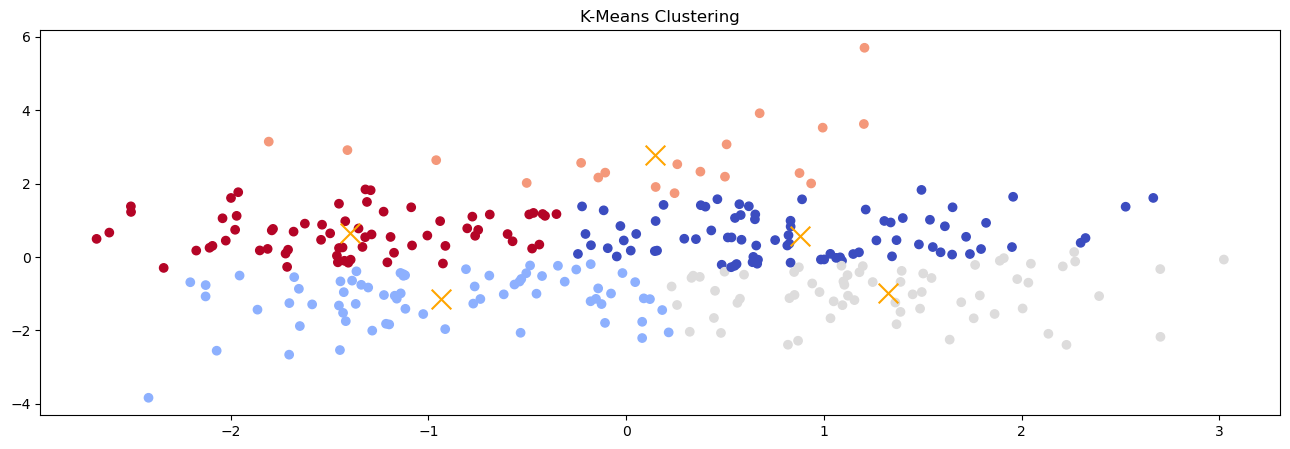

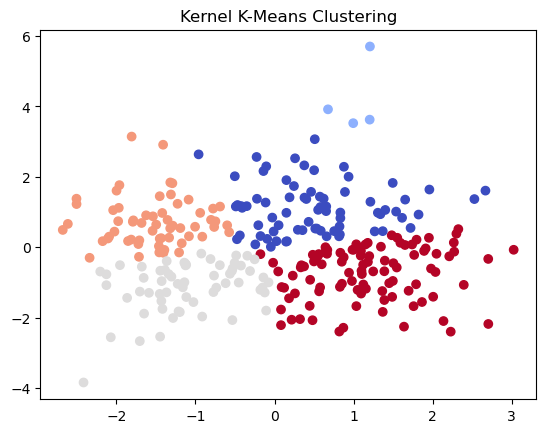

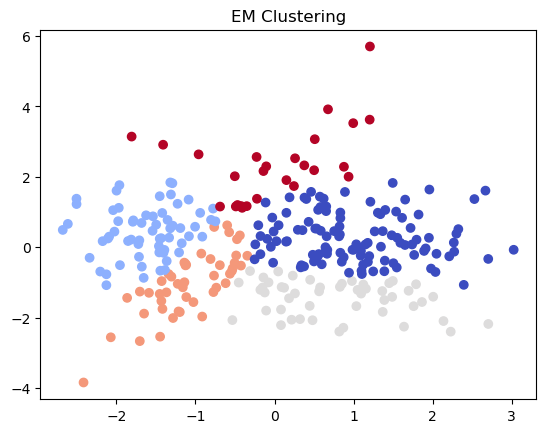

In [34]:
# Visualization of clustering results (Scatter plots)
plt.figure(figsize=(16, 5))

# K-Means clustering
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=sk_learn_labels, cmap='coolwarm')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='orange', marker='x', s=200, label='Scikit-learn Centroids')
plt.title("K-Means Clustering")
plt.show()

# Kernel K-Means clustering
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=kernel_kmeans_clusters, cmap='coolwarm')
plt.title("Kernel K-Means Clustering")
plt.show()

# EM clustering
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=em_clusters, cmap='coolwarm')
plt.title("EM Clustering")
plt.show()


# Regression Analysis 

In [15]:
data_reg = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [16]:
data_reg.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [17]:
#Preparing Data for Regression analysis
clinical_features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure',
                     'platelets', 'serum_creatinine', 'serum_sodium', 'time']
X_reg = data_reg[clinical_features]
y_reg = data_reg['DEATH_EVENT']

In [18]:
#splitting data set
X_train, X_test, y_train, y_test = train_test_split(X_reg,y_reg,random_state=101,test_size=0.3)

#linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_prediction_linear = linear_regression.predict(X_test)

In [19]:
#Ridge Regression
ridge_regression = Ridge(alpha=1.0) 
ridge_regression.fit(X_train, y_train)
y_prediction_ridge = ridge_regression.predict(X_test)

In [20]:
#Evaluating using Linear and Ridge Regression using Mean Squared Error
mse_linear_reg = mean_squared_error(y_test, y_prediction_linear)
mse_ridge_reg = mean_squared_error(y_test, y_prediction_ridge)

print(f"Mean Squared Error (Linear Regression): {mse_linear_reg:.4f}")
print(f"Mean Squared Error (Ridge Regression): {mse_ridge_reg:.4f}")

Mean Squared Error (Linear Regression): 0.1254
Mean Squared Error (Ridge Regression): 0.1253


# Classification Analysis

In [23]:
data_class = pd.read_csv('heart_failure_clinical_records_dataset.csv')

X = data_class[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium',  'time']]
y = data_class['DEATH_EVENT']

In [24]:
#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=107)

# Bayesian Classifier (Gaussian Naive Bayes)
bayesian_classifier = GaussianNB()
bayesian_classifier.fit(X_train, y_train)
y_pred_bayesian = bayesian_classifier.predict(X_test)

In [25]:
# Naive Bayes (Gaussian Naive Bayes)
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_naive_bayes = naive_bayes.predict(X_test)

In [26]:
#accuracy measure
accuracy_bayesian = accuracy_score(y_test, y_pred_bayesian)
print(f"Accuracy (Bayesian Classifier): {accuracy_bayesian:.2f}")

accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
print(f"Accuracy (Naive Bayes): {accuracy_naive_bayes:.2f}")

Accuracy (Bayesian Classifier): 0.72
Accuracy (Naive Bayes): 0.72


In [27]:
#classification report
print("Classification Report (Bayesian Classifier):")
print(classification_report(y_test, y_pred_bayesian))

Classification Report (Bayesian Classifier):
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        35
           1       0.72      0.52      0.60        25

    accuracy                           0.72        60
   macro avg       0.72      0.69      0.69        60
weighted avg       0.72      0.72      0.71        60



In [28]:
print("Classification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_naive_bayes))

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        35
           1       0.72      0.52      0.60        25

    accuracy                           0.72        60
   macro avg       0.72      0.69      0.69        60
weighted avg       0.72      0.72      0.71        60



In [29]:
#Implementing KNN 
knn_classifier = KNeighborsClassifier(n_neighbors=7)  
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy (KNN): {accuracy_knn:.2f}")


Accuracy (KNN): 0.65
